In [17]:
import numpy as np
import sys
sys.path.append("..") 
import cab
import matplotlib.pyplot as plt

### load transfer function

In [18]:
kbyh,Tfn= np.loadtxt('cambTf_Om0.231_Ol0.724_Ob0.045_h0.700_ns0.961_z0.dat',usecols=[0,1],unpack = True)

In [19]:
cab = cab.cosmology(kbyh=kbyh,Tfn=Tfn)
m = np.logspace(12,15,10)
nu0 = cab.PeakHeight(m,z=0)
nu1 = cab.PeakHeight(m,z=1)
t10_z0 = cab.T10(m,0)
t10_z1 = cab.T10(m,1)

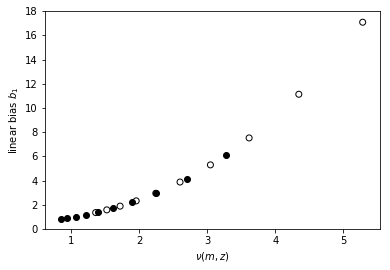

In [20]:
fig = plt.figure(1)
ax1 = plt.scatter(nu0,t10_z0,color='k')
ax2 = plt.scatter(nu1,t10_z1,color='k',facecolors='none')
plt.xlabel(r'$\nu(m,z)$')
plt.ylabel('linear bias $b_{1}$')
plt.show()

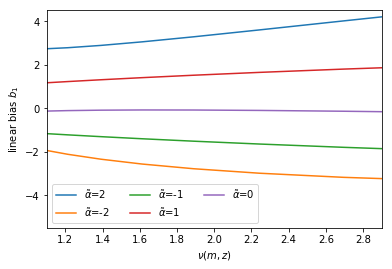

In [38]:
plt.plot(nu0,cab.b1avg(m,0,2)-t10_z0,label=r'$\tilde{\alpha}$=2')
plt.plot(nu0,cab.b1avg(m,0,-2)-t10_z0,label=r'$\tilde{\alpha}$=-2')
plt.plot(nu0,cab.b1avg(m,0,-1)-t10_z0,label=r'$\tilde{\alpha}$=-1')
plt.plot(nu0,cab.b1avg(m,0,1)-t10_z0,label=r'$\tilde{\alpha}$=1')
plt.plot(nu0,cab.b1avg(m,0,0)-t10_z0,label=r'$\tilde{\alpha}$=0')
plt.xlabel(r'$\nu(m,z)$')
plt.ylabel('linear bias $b_{1}$')
plt.ylim([-5.5,4.5])
plt.xlim([1.1,2.9])
plt.legend(loc='lower left', ncol=3)
plt.show()